# Import libraries

In [1]:
import pandas as pd
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
#import errors and r square
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import scipy.stats as stats
import seaborn as sns

# Import dataset

In [2]:
df=pd.read_csv('Zameen property data.csv')
df.head()

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,agent
0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,4 Marla,For Sale,2,02-04-2019,NaN,NaN
1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,5.6 Marla,For Sale,3,05-04-2019,NaN,NaN
2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,8 Marla,For Sale,5,07-17-2019,NaN,NaN
3,656161,340,https://www.zameen.com/Property/islamabad_bani...,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,2 Kanal,For Sale,4,04-05-2019,NaN,NaN
4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,8 Marla,For Sale,3,07-10-2019,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director


In [3]:
houses=df.shape[0]
houses

168446

# Sum of null values

In [4]:
df.isnull().sum()

property_id          0
location_id          0
page_url             0
property_type        0
price                0
location             0
city                 0
province_name        0
latitude             0
longitude            0
baths                0
area                 0
purpose              0
bedrooms             0
date_added           0
agency           44071
agent            44072
dtype: int64

# Sum of NAN values

In [5]:
NAN_value=pd.isnull(df).sum()
NAN_value[NAN_value>0]

agency    44071
agent     44072
dtype: int64

# Heat Map to check null 

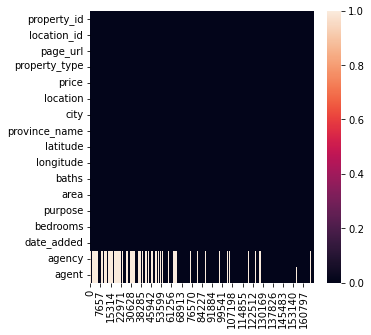

In [6]:
plt.figure(figsize=(5,5))
sns.heatmap(df.isnull().T);

# sum of missing values and their percentages

In [7]:
pd.set_option('display.max_rows', None)
missing_value= pd.DataFrame(df.isnull().sum().sort_values(ascending = False), columns = ['sum_of_missing_values'])
missing_value['percentage_of_missing_values'] = missing_value['sum_of_missing_values']/df.shape[0]*100
missing_value = missing_value[missing_value['sum_of_missing_values']>0]
missing_value

,sum_of_missing_values,percentage_of_missing_values
agent,44072,26.163874
agency,44071,26.163281


# display count plot to check missing values

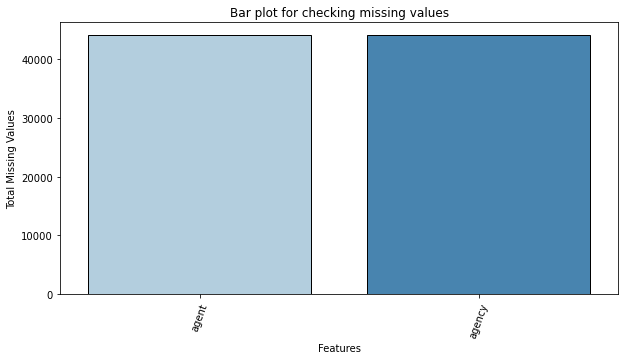

In [8]:
plt.figure(figsize = (10, 5))
sns.barplot(x = missing_value.index, y = missing_value['sum_of_missing_values'],palette ='Blues',edgecolor='black')
plt.xticks(rotation =70)
plt.title("Bar plot for checking missing values")
plt.xlabel("Features")
plt.ylabel("Total Missing Values")
plt.show()

In [9]:
df.drop(['agent'], axis=1, inplace=True)
df.drop(['agency'], axis=1, inplace=True)

In [10]:
df.isnull().sum().any()

False

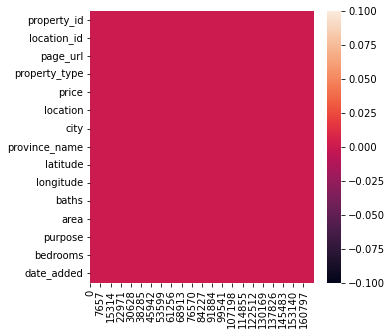

In [11]:
plt.figure(figsize=(5,5))
sns.heatmap(df.isnull().T);

In [12]:
df_object = df.select_dtypes(include=['object'])
df_object.head()

,page_url,property_type,location,city,province_name,area,purpose,date_added
0,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,G-10,Islamabad,Islamabad Capital,4 Marla,For Sale,02-04-2019
1,https://www.zameen.com/Property/e_11_2_service...,Flat,E-11,Islamabad,Islamabad Capital,5.6 Marla,For Sale,05-04-2019
2,https://www.zameen.com/Property/islamabad_g_15...,House,G-15,Islamabad,Islamabad Capital,8 Marla,For Sale,07-17-2019
3,https://www.zameen.com/Property/islamabad_bani...,House,Bani Gala,Islamabad,Islamabad Capital,2 Kanal,For Sale,04-05-2019
4,https://www.zameen.com/Property/dha_valley_dha...,House,DHA Defence,Islamabad,Islamabad Capital,8 Marla,For Sale,07-10-2019


In [13]:
df_exclude_object = df.select_dtypes(exclude=['object'])
df_exclude_object.head()

,property_id,location_id,price,latitude,longitude,baths,bedrooms
0,237062,3325,10000000,33.679890,73.012640,2,2
1,346905,3236,6900000,33.700993,72.971492,3,3
2,386513,764,16500000,33.631486,72.926559,6,5
3,656161,340,43500000,33.707573,73.151199,4,4
4,841645,3226,7000000,33.492591,73.301339,3,3


# Count of Property Type,City,Province and purpose

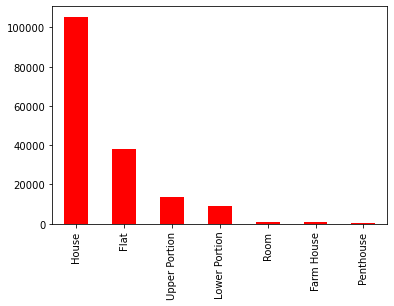

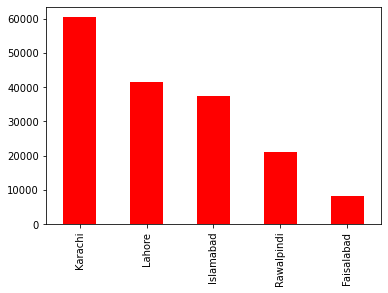

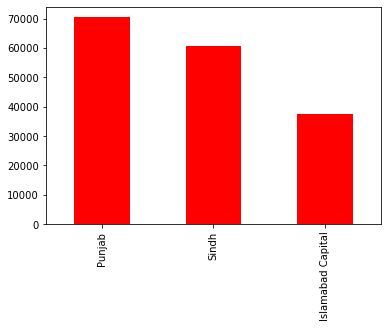

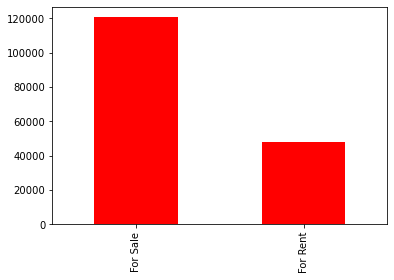

In [14]:
# visualise the count of each category in categorical columns

categorical = ['property_type', 'city', 'province_name', 'purpose']

for i, cat_feature in enumerate(df[categorical]):
    df[cat_feature].value_counts().plot(kind = 'bar', color = 'red')
    plt.show()

# Property type Vs Price

<AxesSubplot:xlabel='price', ylabel='property_type'>

<Figure size 720x576 with 0 Axes>

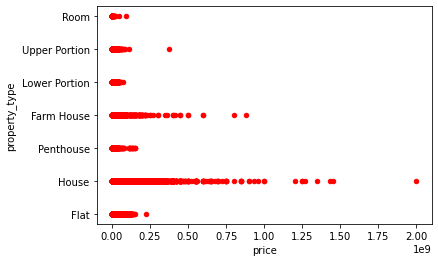

In [15]:
fig = plt.figure(figsize = (10,8))
df.plot.scatter(x = 'price', y = 'property_type', color = 'red',s=20)

In [16]:
sns.scatterplot(data=df, x='month' , y="price" , hue ="property_type" )
plt.gcf().set_size_inches((5,5))

ValueError: Could not interpret value `month` for parameter `x`

In [ ]:
plt.rcParams['figure.figsize'] = (8,4)
plt.xticks(rotation=27)
sns.distplot(df['price'])
plt.title('Distribution of Prices')
plt.show()

In [ ]:
df.drop(df[df['price'] >= 1450000000].index, inplace = True)
df.drop(df[df['baths'] >= 14].index, inplace = True)

In [19]:
from scipy import stats

def drop_numerical_outliers(df, z_thresh=3):
    # Constrains will contain `True` or `False` depending on if it is a value below the threshold.
    constrains = df.select_dtypes(include=[np.number]) \
        .apply(lambda x: np.abs(stats.zscore(x)) < z_thresh) \
        .all(axis=1)
    # Drop (inplace) values set to be rejected
    df.drop(df.index[~constrains], inplace=True)

In [20]:
drop_numerical_outliers(df)

In [21]:
d

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added
3111,8843737,4024,https://www.zameen.com/Property/marghzar_offic...,House,7000000,Marghzar Officers Colony,Lahore,Punjab,31.499385,74.248524,4,3 Marla,For Sale,6,07-03-2019
3112,8844772,783,https://www.zameen.com/Property/lahore_shadbag...,House,25000000,Shadbagh,Lahore,Punjab,31.602644,74.340019,4,10 Marla,For Sale,5,07-03-2019
3113,8848179,128,https://www.zameen.com/Property/lahore_raiwind...,House,24500000,Raiwind Road,Lahore,Punjab,31.429249,74.230785,5,1 Kanal,For Sale,4,07-03-2019
3114,8857181,4575,https://www.zameen.com/Property/lahore_ring_ro...,House,6000000,Ring Road,Lahore,Punjab,31.595041,74.480950,4,3 Marla,For Sale,3,07-03-2019
3115,8858428,4183,https://www.zameen.com/Property/samanabad_sama...,House,25000000,Samanabad,Lahore,Punjab,31.534250,74.300730,4,11 Marla,For Sale,5,07-03-2019


In [22]:
#Boxplots from one or more columns are shown using this function.
def show_graphs(df, lst, title=""):
    if len(lst) > 1:
        fig, axs = plt.subplots(1, len(lst), figsize=(16, 5))
        for i in range(0, len(lst)):
            axs[i].boxplot(df[lst[i]])
            axs[i].set_title(lst[i])
        fig.suptitle(title)
    else:
        fig, axs = plt.subplots(figsize=(16, 8))
        axs.boxplot(df[lst[0]])
        axs.set_title(lst[0])
        fig.suptitle(title)

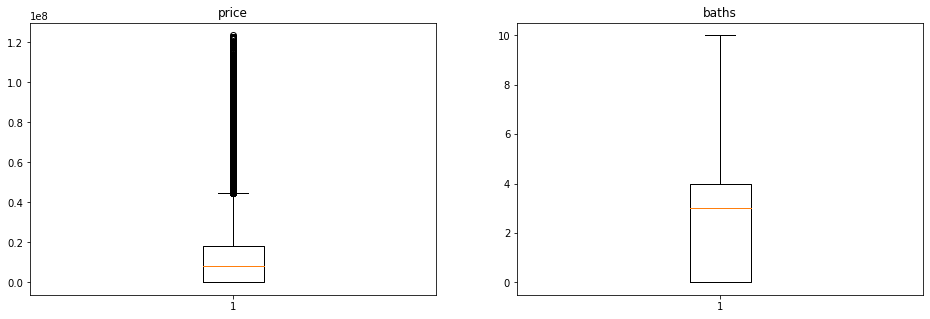

In [23]:
#Check the Outliers
show_graphs(df,['price','baths'])

In [ ]:
df.to_csv("df.csv",index=False)

<AxesSubplot:xlabel='price', ylabel='property_type'>

<Figure size 720x576 with 0 Axes>

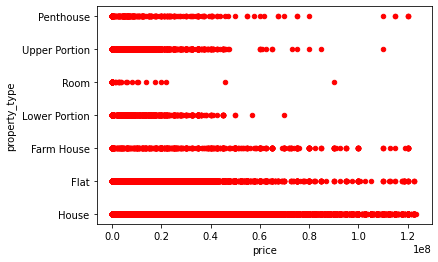

In [24]:
fig = plt.figure(figsize = (10,8))
df.plot.scatter(x = 'price', y = 'property_type', color = 'red',s=20)

In [ ]:
# lets import the scipy package
import scipy.stats as stats
import math

# lets seed the random values
np.random.seed(10)

# lets take a sample size
sample_size = 1000
sample = np.random.choice(a= df['price'],
                          size = sample_size)
sample_mean = sample.mean()

# Get the z-critical value*
z_critical = stats.norm.ppf(q = 0.95)  

 # Check the z-critical value  
print("z-critical value: ",z_critical)                                
# Get the population standard deviation
pop_stdev = df['price'].std()  

# checking the margin of error
margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size)) 

# defining our confidence interval
confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)  

# lets print the results
print("Confidence interval:",end=" ")
print(confidence_interval)
print("True mean: {}".format(df['price'].mean()))

In [ ]:
np.random.seed(12)

sample_size = 6500

intervals = []
sample_means = []

for sample in range(25):
    sample = np.random.choice(a= df['price'], size = sample_size)
    sample_mean = sample.mean()
    sample_means.append(sample_mean)

     # Get the z-critical value* 
    z_critical = stats.norm.ppf(q = 0.975)      
    # Get the population standard deviation
    pop_stdev = df['price'].std()  

    stats.norm.ppf(q = 0.025)

    margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size))

    confidence_interval = (sample_mean - margin_of_error,
                           sample_mean + margin_of_error)  
    
    intervals.append(confidence_interval)
    

plt.figure(figsize=(13, 9))

plt.errorbar(x=np.arange(0.1, 25, 1), 
             y=sample_means, 
             yerr=[(top-bot)/2 for top,bot in intervals],
             fmt='o')
plt.hlines(xmin=0, xmax=25,
           y=df['price'].mean(), 
           linewidth=2.0,
           color="red")
plt.title('Confidence Intervals for 25 Trials', fontsize = 10)
plt.show()

In [ ]:
fig = plt.figure(figsize=(10,5))
plt.subplot(131)
plt.title('frequency distribution\n(Histogram)')
df['price'].plot(kind='hist')
plt.xlabel('age')

plt.subplot(132)
plt.title('frequency distribution\n(Density Plot)')
df['price'].plot(kind='kde')
plt.xlabel('age')

plt.subplot(133)
plt.title('frequency distribution\n(Boxplot)')
df['price'].plot(kind='box')

plt.tight_layout()
plt.show()

In [ ]:
df.corr()

In [ ]:
sns.heatmap(df.corr(), annot=True, annot_kws={"size": 8}, fmt='.4f', square=True, cmap='mako')

# Total No of Houses in Islamabad and Karachi

In [ ]:
houses_in_isb = df[df['city'] == 'Islamabad'].shape[0]
print("Total Number of Houses in city Islamabad:", houses_in_isb)
houses_in_khi = df[df['city'] == 'Karachi'].shape[0]
print("Total Number of Houses in city Karachi:", houses_in_khi)


# probability of getting house in Islamabad 

In [ ]:
probability = (houses_in_isb/houses)*100
print('Probability of getting a house is Islamabad City: {0:.2f}'.format(probability )+'%')

# probability of getting house in Karachi

In [ ]:
probability = (houses_in_khi/houses)*100
print('Probability of getting a house is Karachi City: {0:.2f}'.format(probability )+'%')

# Probability of getting a house in Karachi and again getting a house from Karachi

In [ ]:
cond_prob = (houses_in_khi/houses) * ((houses_in_khi - 1)/(houses - 1)) 
print("The Probability of getting a house in Karachi and again picking a house from Karachi is {0:.9f}".
      format(cond_prob*100)+'%')

In [ ]:
plt.rcParams['figure.figsize'] = (8,4)
plt.xticks(rotation=27)
sns.distplot(df['price'])
plt.title('Distribution of Prices')
plt.show()

In [ ]:
np.random.seed(6)

# Sample Mean and  Population Mean

In [ ]:
# Take 6500 sample values 
sample_ages = np.random.choice(a= df['price'], size=6500)

# sample mean
print ("Sample mean:", sample_ages.mean() )          

# population mean
print("Population mean:", df['price'].mean())

# Are Prices (House) in Karachi different from Other Cities?

# Null Hypotheis:Price of House in karachi aren't different from other cities.

# Alternative Hypothesis: Price of House in karachi are different from  Other cities.(claim)

In [ ]:
#z test from statsmodels
from statsmodels.stats.weightstats import ztest

z_statistic, p_value = ztest(x1 = df[df['city'] == 'Karachi']['price'],
                             value = df['price'].mean())

print('Z-statistic is :{}'.format(z_statistic))
print('P-value is :{:.50f}'.format(p_value))

# ---If the P value if less than 0.05, reject null hypothesis against the alternate hypothesis.

# --- P value is smaller than 0.05 ,Fail to accept null hypothesis. 

# ---There is no enough evidence to reject the claim that prices of house in Karachi are different from other cities.

# Probability of Getting a Flat greater than Rs. 5,000,000

In [ ]:
flat_count = 0
for x,y in zip(df['price'],df['property_type']):
    if ((x>=5000000) and (y=="Flat")):
        flat_count = flat_count +1
print("Count of Flats having price > Rs5,000,000","Total no of flats", flat_count)  

In [ ]:
Prob1 = flat_count/len(df.index)
Prob1

# Probability of Getting a Flat Given it has 2 baths.

In [ ]:
bath = 0
flat = 0
prob_flat = 0
prob_bath = 0
for x in df['property_type']:
    if (x=="Flat"):
        flat = flat + 1
prob_flat = flat/len(df.index)

for x in df['baths']:
    if(x == 2):
        bath = bath + 1
prob_bath = bath/len(df.index)

prob_flat_2bath = (prob_flat*prob_bath)/prob_bath
print("Probabilty of Getting a flat Given that it has 2 baths is:", prob_flat_2bath)

# The probability that the house is above 40000000 given its area is 2 kanal.

In [ ]:
prop_price = 0
prop_size = 0
prob_price_40000k = 0
prob_size_2k = 0
for x in df['price']:
    if (x >= 40000000):
        prop_price = prop_price + 1
prob_price_40000k = prop_price/len(df.index)

for x in df['area']:
    if(x == '2 Kanal'):
        prop_size = prop_size + 1
prob_size_2k = prop_size/len(df.index)

prob_40000k_2k = (prob_price_40000k*prob_size_2k)/prob_size_2k
print("The probability that the house is above 40000000 given its area is 2 kanal:", prob_40000k_2k)

# Which city has the highest Average property prices in Punjab?

In [ ]:
df_fsl = df.loc[df['city'].isin(['Faisalabad'])]
df_lhr = df.loc[df['city'].isin(['Lahore'])]
df_rwp = df.loc[df['city'].isin(['Rawalpindi'])]

In [ ]:
lhr_price = 0
fsl_price = 0
rwp_price = 0
lhr_price = df_lhr['price'].median()    
rwp_price = df_rwp['price'].median()
fsl_price = df_fsl['price'].median()

print(lhr_price,"  ",rwp_price,"  ",fsl_price)       


median_price = max(lhr_price,rwp_price,fsl_price)
print("Lahore has the highest median price in Punjab i.e.:",median_price)

# It's easy to buy a 2 bedroom apartment in Islamabad than in Karachi

In [ ]:
df_khi = df.loc[df['city'].isin(['Karachi'])]
df_khi_2 = df_khi.loc[df_khi['bedrooms']==2]
df_khi_2 = df_khi.loc[df_khi['property_type']=='Flat']
khi_price = df_khi_2['price'].mean()
khi_price

In [ ]:
df_isl = df.loc[df['city'].isin(['Islamabad'])]
df_isl_2 = df_isl.loc[df_isl['bedrooms']==2]
df_isl_2 = df_isl.loc[df_isl['property_type']=='Flat']
isl_price = df_isl_2['price'].mean()
print(isl_price)
print("Average property price for 2 bedroom appartment in karachi is 1.5 times that of Islamabad")